In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Input/Churn_Modelling.csv')
data.shape

(10000, 14)

In [ ]:
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [ ]:
# splitting the data
x = data.iloc[:, 3:13]
y = data.iloc[:, 13]

In [ ]:
# Number of indep variables
x.shape[1]

10

In [ ]:
# creating dummies
Geography = pd.get_dummies(x['Geography'], drop_first = True)
Gender = pd.get_dummies(x['Gender'], drop_first = True)

In [ ]:
# drop the existing variable from data frame
x = x.drop(['Geography', 'Gender'], axis=1)

# Concat the dummy variable
x = pd.concat([x, Geography, Gender], axis=1)

In [ ]:
# data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# import libraries for ANN
import keras
from keras.models import Sequential           # To Intiate the NN architecture
from keras.layers import Dense                # To build layers in ANN (input, hidden, output)

In [ ]:
# Initalise ANN
model = Sequential()

# Building the layer

# Input layer
model.add(Dense(units=11, kernel_initializer='he_uniform', input_dim=11))

# first hidden layer
model.add(Dense(units=9, kernel_initializer='he_uniform', activation='relu'))

# output layer
model.add(Dense(units=1, kernel_initializer='he_uniform', activation='sigmoid'))

# compiling
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# fit to the data
model_history = model.fit(X_train, y_train, validation_split=0.3, batch_size=10, epochs=30)

Epoch 1/30
490/490 [==============================] - 6s 6ms/step - loss: 0.5767 - accuracy: 0.7492 - val_loss: 0.4592 - val_accuracy: 0.8024
Epoch 2/30
490/490 [==============================] - 1s 2ms/step - loss: 0.4482 - accuracy: 0.7988 - val_loss: 0.4303 - val_accuracy: 0.8167
Epoch 3/30
490/490 [==============================] - 1s 2ms/step - loss: 0.4327 - accuracy: 0.8088 - val_loss: 0.4226 - val_accuracy: 0.8238
Epoch 4/30
490/490 [==============================] - 1s 2ms/step - loss: 0.4236 - accuracy: 0.8176 - val_loss: 0.4176 - val_accuracy: 0.8281
Epoch 5/30
490/490 [==============================] - 1s 2ms/step - loss: 0.4180 - accuracy: 0.8224 - val_loss: 0.4156 - val_accuracy: 0.8352
Epoch 6/30
490/490 [==============================] - 1s 2ms/step - loss: 0.4122 - accuracy: 0.8253 - val_loss: 0.4151 - val_accuracy: 0.8352
Epoch 7/30
490/490 [==============================] - 2s 4ms/step - loss: 0.4086 - accuracy: 0.8312 - val_loss: 0.4087 - val_accuracy: 0.8386
Epoch 

In [ ]:
# Parameter calculation # first layer --> (no.of.neurons x no.of.input) + no.of.bias
    # no.of.neurons = 11
    # no.of.input = 11
    # no.of.bias = 11
    # no of params = (11*11)+11 = 132

# first hidden layer
    # no.of.neurons = 9
    # no.of.input = 11
    # no.of.bias = 9
    # no of params = (9*11)+9 = 108

# output layer
    # no.of.neurons = 1
    # no.of.input = 9
    # no.of.bias = 1
    # no of params = (1*9)+1 = 10

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 9)                 108       
                                                                 
 dense_11 (Dense)            (None, 1)                 10        
                                                                 
Total params: 250 (1000.00 Byte)
Trainable params: 250 (1000.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


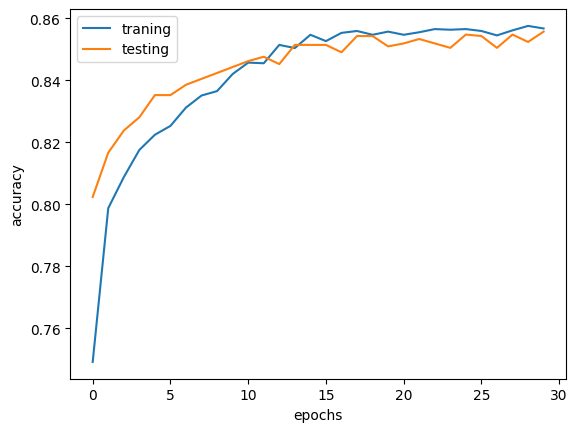

In [22]:
print(model_history.history.keys())

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['traning', 'testing'])
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


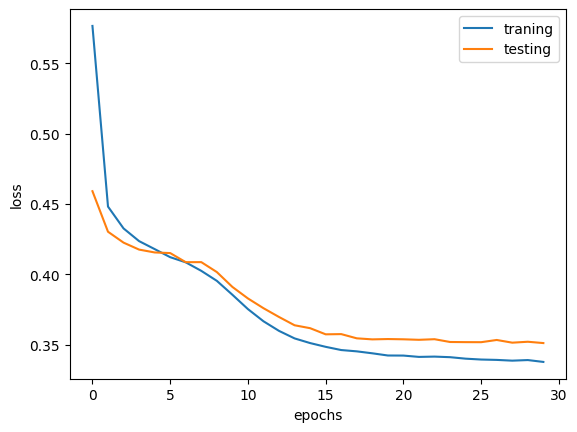

In [23]:
print(model_history.history.keys())

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['traning', 'testing'])
plt.show()

In [27]:
# predicting the results
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
print('Testing Accuracy:', round(score,2))

94/94 [==============================] - 0s 3ms/step
[[2330   86]
 [ 308  276]]
Testing Accuracy: 0.87
